# Short Put Option

### I. Strategy Overview

#### Payoff

![](short_put.jpg)

#### Features:
* Long Delta: profit of the strategy increases as the underlying price goes up
* Long Theta: profit of the strategy increases as time decays
* Short volatility: profit of the strategy increases as the implied volatility drops

### II. Strategy Setup

In [1]:
import sys  
sys.path.insert(0, 'C:\\Users\\chena\\Desktop\\Trading\\StrategicOptions\\')
import datetime
from Functions.Backtest import OptionBackTesting, BackTestingVisualization

####  1. Input symbol of underlying

In [2]:
Ticker = 'MSFT'

#### 2. Specify testing period and find out the expiration dates within

In [3]:
Start_Date = datetime.datetime(2017, 1, 4)
End_Date = datetime.datetime(2018,3, 1)

expiry = OptionBackTesting(Ticker, [], [], Start_Date, End_Date, [], []).set_expiration_calendar()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1088: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


#### 3. Select an expiration date

In [4]:
expiration = datetime.datetime(2018, 3, 18)

#### 4. Choose option enter and exit dates

In [5]:
entry_date = datetime.datetime(2017, 1, 4)
exit_date = datetime.datetime(2018, 3, 1)

#### 5. Option Type & Strike Price Selection
* Use -P to represent 'Short Put'
* Change the strike price to see how it affects the strategy

In [6]:
option_type = 'P'
action = 'S'
strike_price = 55  # At the money
# strike_price = 40  # Deep in the money
# strike_price = 65  # Far out of the money

### III. Visualization
#### 1. Generate options basic data

In [7]:
option_data = OptionBackTesting(Ticker, strike_price, expiration, entry_date, exit_date, option_type, action)
option_price, option_return, underlying_price, underlying_return, trading_days, iv, hv = option_data.generate_data()

##### 2. Speficy spot price range and generate payoff chart

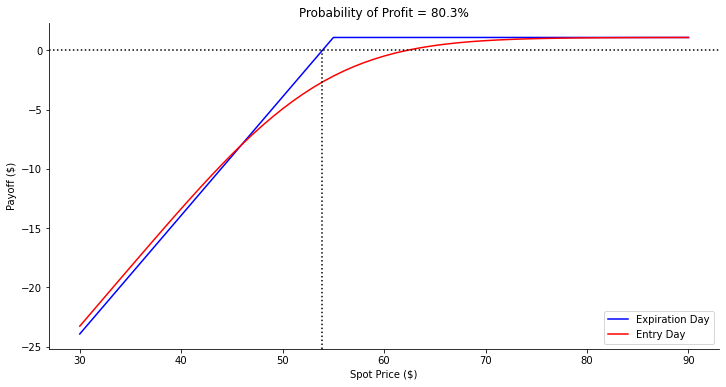

In [8]:
lower_limit = 30 # Modify to customize the lower bound of x-axis
upper_limit = 90 # Modify to customize the upper bound of x-axisa

# Generate payoffs
payoff_calc = BackTestingVisualization(trading_days, option_price, underlying_price, option_return, underlying_return, iv, strike_price, expiration, entry_date, exit_date, lower_limit, upper_limit, option_type, action)
payoff_calc.plot_payoff()

# Probability of profit


#### 3. Price Moves

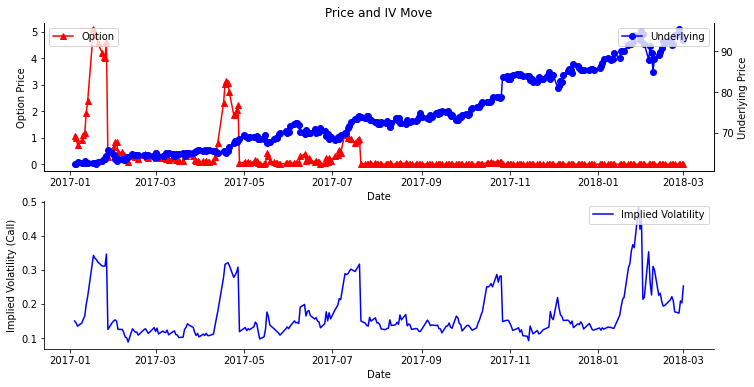

In [9]:
# viz = BackTestingVisualization(trading_days, option_price, underlying_price, option_return, underlying_return, iv,[],[],[],[],[],[])
payoff_calc.plot_price_history()

#### 4. Returns

In [22]:
payoff_calc.option_price

Date
2018-01-03    0.080812
2018-01-04    0.062171
2018-01-05    0.023206
2018-01-08    0.023809
2018-01-09    0.021078
2018-01-10    0.026483
2018-01-11    0.017356
2018-01-12    0.004290
2018-01-16    0.048318
2018-01-17    0.039017
2018-01-18    0.066340
2018-01-19    0.073617
2018-01-22    0.163918
2018-01-23    0.163535
2018-01-24    0.248654
2018-01-25    0.248053
dtype: float64

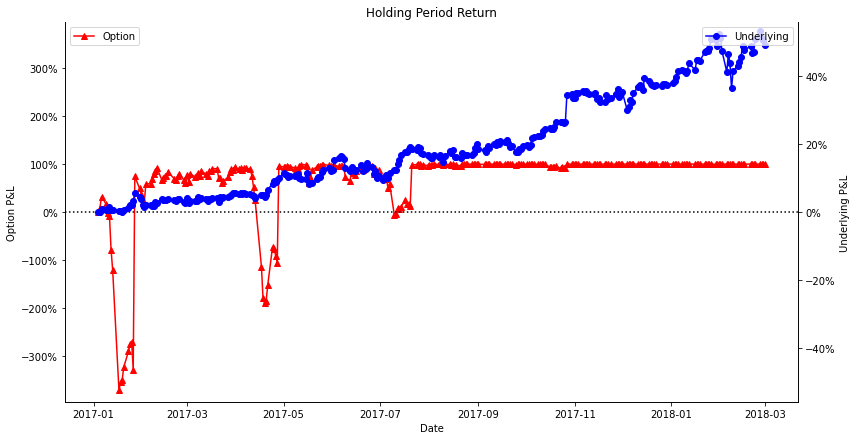

In [12]:
payoff_calc.plot_option_pnl()

### IV. Trade Journaling

### Change the ROC calculation and use BPR as the cost basis

In [23]:
payoff_calc.print_strategy_summary()
payoff_calc.strategy_summary

NameError: name 'payoaff_calc' is not defined

### V. Recurring Strategy Setup
Get in when:
Simplified
* 1st trading day of every month
* Buy next month's expiration

Realistic:
* IV < 0
* Expiration date < 60 & Expiration date > 60
* VIX < 20

In [14]:
import pandas as pd
from datetime import timedelta

trading_days['Year-Month'] = trading_days['Date'].dt.to_period('M') + 1  # +1 to find the expiration date in the next month
dte_seeker = pd.merge(trading_days, expiry, on='Year-Month', how='left')
dte_seeker['DTE'] = (pd.to_datetime(dte_seeker['Trading Day']) - pd.to_datetime(dte_seeker['Date'])).dt.days
dte_seeker.dropna(inplace=True)

entry_dates = dte_seeker[dte_seeker['DTE']==43]['Date'].reset_index(drop=True)
expiration_dates = dte_seeker[dte_seeker['DTE']==43]['Trading Day'].reset_index(drop=True)
exit_dates = entry_dates + timedelta(days=22)

In [18]:
expiration_dates = pd.to_datetime(expiration_dates)
strategy_performance = pd.DataFrame([])
i = 0
strike_price = 55
for _ in entry_dates:
    option_data = OptionBackTesting(Ticker, strike_price, expiration_dates[i], entry_dates[i], exit_dates[i], option_type, action)
    option_price, option_return, underlying_price, underlying_return, trading_days, iv, hv = option_data.generate_data()
    payoff_calc = BackTestingVisualization(trading_days, option_price, underlying_price, option_return, underlying_return, iv, strike_price, expiration_dates[i], entry_dates[i], exit_dates[i], lower_limit, upper_limit, option_type, action)
    payoff_calc.print_strategy_summary()
    strategy_performance = strategy_performance.append(payoff_calc.strategy_summary)
    i+=1
    strike_price = underlying_price['close'][-1]-5

In [19]:
win_rate = "{:.2%}".format(strategy_performance['Win'].sum()/len(strategy_performance['Win']))
# Total_Cost = "${:,.2f}".format(strategy_performance['Cost Basis'].sum())

In [20]:
win_rate

'69.23%'

In [21]:
strategy_performance

,Entry Date,Cost Basis,Exit Date,Holding Period (Days),Residual Value,P&L,PnL/Day,ROC,Win
0,2017-01-04,$0.78,2017-01-26,22,$6.55,$-5.77,$-0.26,-88.2%,False
0,2017-02-01,$13.57,2017-02-23,22,$0.08,$13.48,$0.61,16778.8%,True
0,2017-03-15,$1.17,2017-04-06,22,$0.00,$1.17,$0.05,32073.9%,True
0,2017-04-05,$2.27,2017-04-27,22,$12.54,$-10.27,$-0.47,-81.9%,False
0,2017-05-03,$1.75,2017-05-25,22,$0.02,$1.73,$0.08,11324.9%,True
0,2017-06-07,$1.39,2017-06-29,22,$10.99,$-9.60,$-0.44,-87.4%,False
0,2017-07-05,$22.45,2017-07-27,22,$0.01,$22.44,$1.02,223266.0%,True
0,2017-08-02,$20.36,2017-08-24,22,$2.53,$17.83,$0.81,704.1%,True
0,2017-09-06,$8.02,2017-09-28,22,$0.37,$7.65,$0.35,2059.4%,True
0,2017-10-04,$5.18,2017-10-26,22,$5.00,$0.17,$0.01,3.5%,True
